# Full simulations of mean vs fluctuation-driven multistability

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sys
from time_stats import get_isi_cv_1, get_isi_cv_2

from disp import set_plot

In [2]:
from ntwk import SoftmaxNtwk2

In [3]:
N = 2000
D = 100
mself = np.eye(D, dtype=bool)

t_max = 500

## Fluctuation-driven multistable network

In [4]:
MU_J_SELF = 0
MU_J_CROSS = 0
SGM_J_SELF = 1
SGM_J_CROSS = 0

SGM_J = np.nan*np.zeros((D, D))
MU_J = np.nan*np.zeros((D, D))

MU_J[mself] = MU_J_SELF
MU_J[~mself] = MU_J_CROSS

SGM_J[mself] = SGM_J_SELF
SGM_J[~mself] = SGM_J_CROSS

ntwk = SoftmaxNtwk2(N, MU_J, SGM_J)

In [5]:
# run 0
x_0 = np.random.randn(N, D)
x_0[:, :9] *= 5
g = np.inf
t, xs_0, ys_0 = ntwk.run(g=g, t_max=t_max, x_0=x_0, progress=20)

ths_0 = ys_0.mean(axis=1)

........................

In [6]:
# run 1
x_0 = np.random.randn(N, D)
x_0[:, 7:] *= 5
g = np.inf
t, xs_1, ys_1 = ntwk.run(g=g, t_max=t_max, x_0=x_0, progress=20)

ths_1 = ys_1.mean(axis=1)

........................

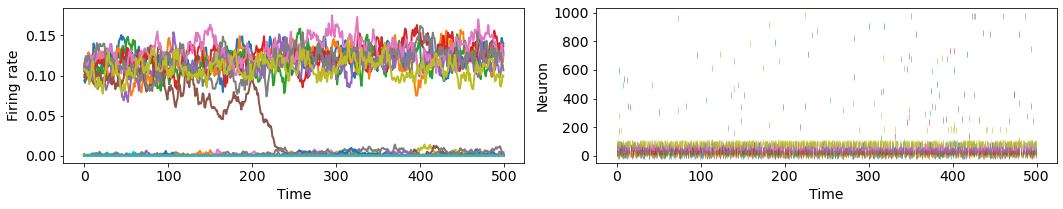

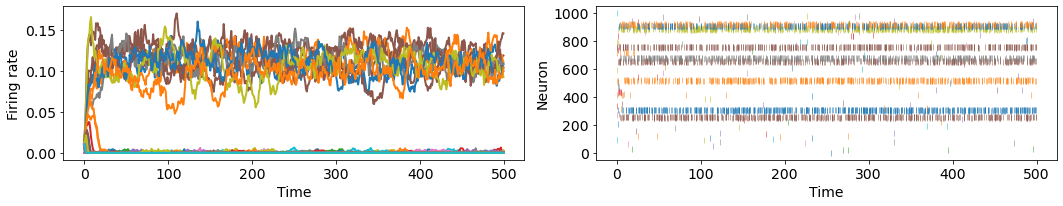

In [7]:
for ys, ths in zip([ys_0, ys_1], [ths_0, ths_1]):
    fig, axs = plt.subplots(1, 2, figsize=(15, 3), tight_layout=True)

    # activations
    axs[0].plot(ths, lw=2)

    nplot_cotuned = 10

    for d in range(D):
        inrns = np.random.permutation(N)[:nplot_cotuned]
        tspks, cspks = ys[:, inrns, d].nonzero()
        axs[1].scatter(tspks, cspks+d*nplot_cotuned, marker='|', lw=.5)

    set_plot(axs[0], x_label='Time', y_label='Firing rate', font_size=14)
    set_plot(axs[1], x_label='Time', y_label='Neuron', font_size=14)